In [1]:
import nltk

In [4]:
#nltk.download_shell()

In [9]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [10]:
for message_no, message in enumerate(messages[:10]):
    print(message_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [11]:
import pandas as pd

In [12]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep = '\t',names = ['label','message'])

In [13]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [16]:
messages['length'] = messages['message'].apply(len)

In [17]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000192D6959C08>,
      dtype=object)

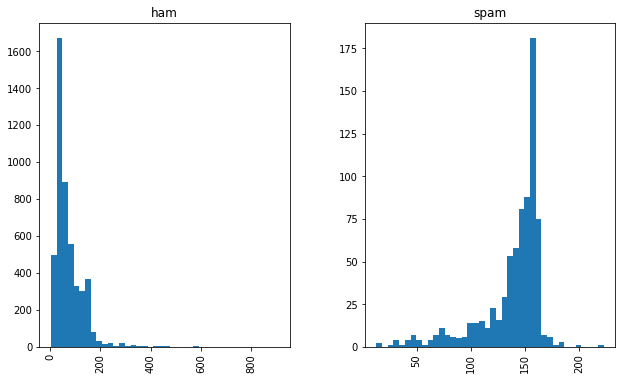

In [24]:
messages['length'].hist(by = messages['label'],bins = 40,figsize=(10,6))

In [25]:
import string

In [28]:
mess = 'Sample message! Notice: it has punctuation.'

In [29]:
nopunc = [word for word in mess if word not in string.punctuation]

In [32]:
nopunc = "".join(nopunc)

In [34]:
nopunc

'Sample message Notice it has punctuation'

In [35]:
from nltk.corpus import stopwords

In [38]:
#stopwords.words('english')

In [39]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [40]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [41]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [45]:
def text_preprocess(message):
    nopunc = [word for word in message if word not in string.punctuation]
    nopunc = "".join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
bow_transformar = CountVectorizer(analyzer=text_preprocess).fit(messages['message'])

In [50]:
print(len(bow_transformar.vocabulary_))

11425


In [51]:
message_bow = bow_transformar.transform(messages['message'])

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [54]:
message_tfidf = tfidf_transformer.transform(message_bow)

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages['message'],messages['label'], test_size=0.3)

In [58]:
from sklearn.pipeline import Pipeline

In [62]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_preprocess)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [63]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocess at 0x00000192DA4DE708>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [64]:
predictions = pipeline.predict(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1463
        spam       1.00      0.74      0.85       209

    accuracy                           0.97      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.97      0.97      1672



[[1463    0]
 [  54  155]]
